## **I. Definição do Problema**  
### **1. Contexto Empresarial**  
No setor bancário, a retenção de clientes é um aspecto crítico para manter a lucratividade e o crescimento, especialmente para serviços que dependem do uso recorrente, como cartões de crédito. O conjunto de dados deste projeto representa uma instituição financeira lidando com o aumento da evasão de clientes, o que impacta a receita e a reputação do banco. Prever quais clientes estão em risco de deixar a instituição permite que o banco intervenha com esforços de retenção, como ofertas personalizadas ou melhorias no serviço, para reduzir a rotatividade e fortalecer a lealdade dos clientes.  

### **2. Objetivo do Modelo de ML**  
- Analisar quais fatores afetam a taxa de evasão de clientes do banco.  
- Desenvolver um modelo preditivo que possa identificar com precisão os clientes em potencial risco de deixar os serviços de cartão de crédito, com base nos dados demográficos e transacionais disponíveis.  
- Fornecer insights acionáveis para que o banco reduza a taxa de evasão e melhore seus negócios.  

### **3. Impacto Empresarial**  
- ***Aumento da Receita:*** Reter clientes existentes geralmente é mais econômico do que adquirir novos. Um modelo eficaz de previsão de evasão permite estratégias de retenção direcionadas, que podem manter e aumentar a receita.  
- ***Eficiência Operacional:*** A automação do processo de previsão reduz a carga de trabalho de identificar manualmente clientes em risco.  
- ***Satisfação do Cliente:*** Ao atender proativamente às necessidades específicas dos clientes em risco, o banco pode melhorar a satisfação geral e construir relacionamentos mais sólidos com os clientes.  


## **III. Data Processing**
### **1. Importando bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score

### **2. Carregando o dataset**

In [9]:
bankchurners = pd.read_csv('BankChurners.csv') 
bankchurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
bankchurners.shape

(10127, 23)

In [6]:
bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### **3.Limpeza dos dados**

In [10]:
# removendo colunas desnecessárias
if 'CLIENTNUM' in bankchurners.columns:
    bankchurners.drop(['CLIENTNUM'], axis=1, inplace=True)
bankchurners.drop(columns=[col for col in bankchurners.columns if "Unnamed" in col], inplace=True)

# removendo colunas especificas do Naive Bayes 
bankchurners.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1, inplace=True)

In [12]:
# verificando valores nulos
bankchurners.isnull().sum()


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
bankchurners['Gender'] = bankchurners['Gender'].map({'M':1,"F":0})
bankchurners['Attrition_Flag'] = bankchurners['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [14]:
bankchurners.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## **IV. Exploratory Data Analysis (EDA)**

In [15]:
bankchurners.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


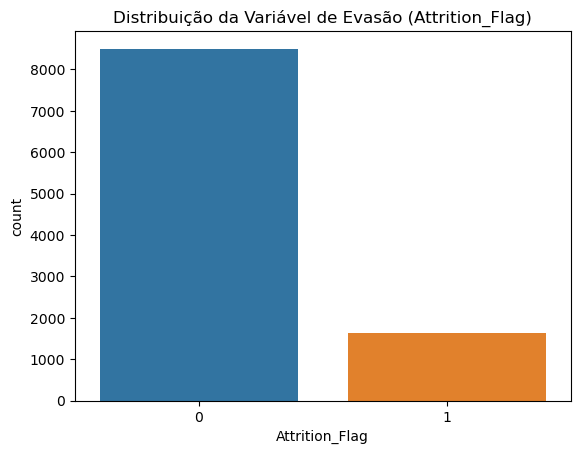

Taxa de Evasão: 16.07%


In [17]:
# Analisar a variável alvo Attrition_Flag (evasão de clientes)
sns.countplot(data=bankchurners, x='Attrition_Flag')
plt.title("Distribuição da Variável de Evasão (Attrition_Flag)")
plt.show()

# Calcular a taxa de evasão
churn_rate = bankchurners['Attrition_Flag'].mean() * 100
print(f"Taxa de Evasão: {churn_rate:.2f}%")



Attrition_Flag (valor alvo): Há um claro desequilíbrio de classes, com uma diferença significativa entre o número de clientes atuais e desligados. Como os clientes que se desviam representam apenas cerca de 16% do conjunto de dados, lidar com esse desequilíbrio será crucial para garantir previsões precisas.

### ***2. Distribuição das variáveis independentes***

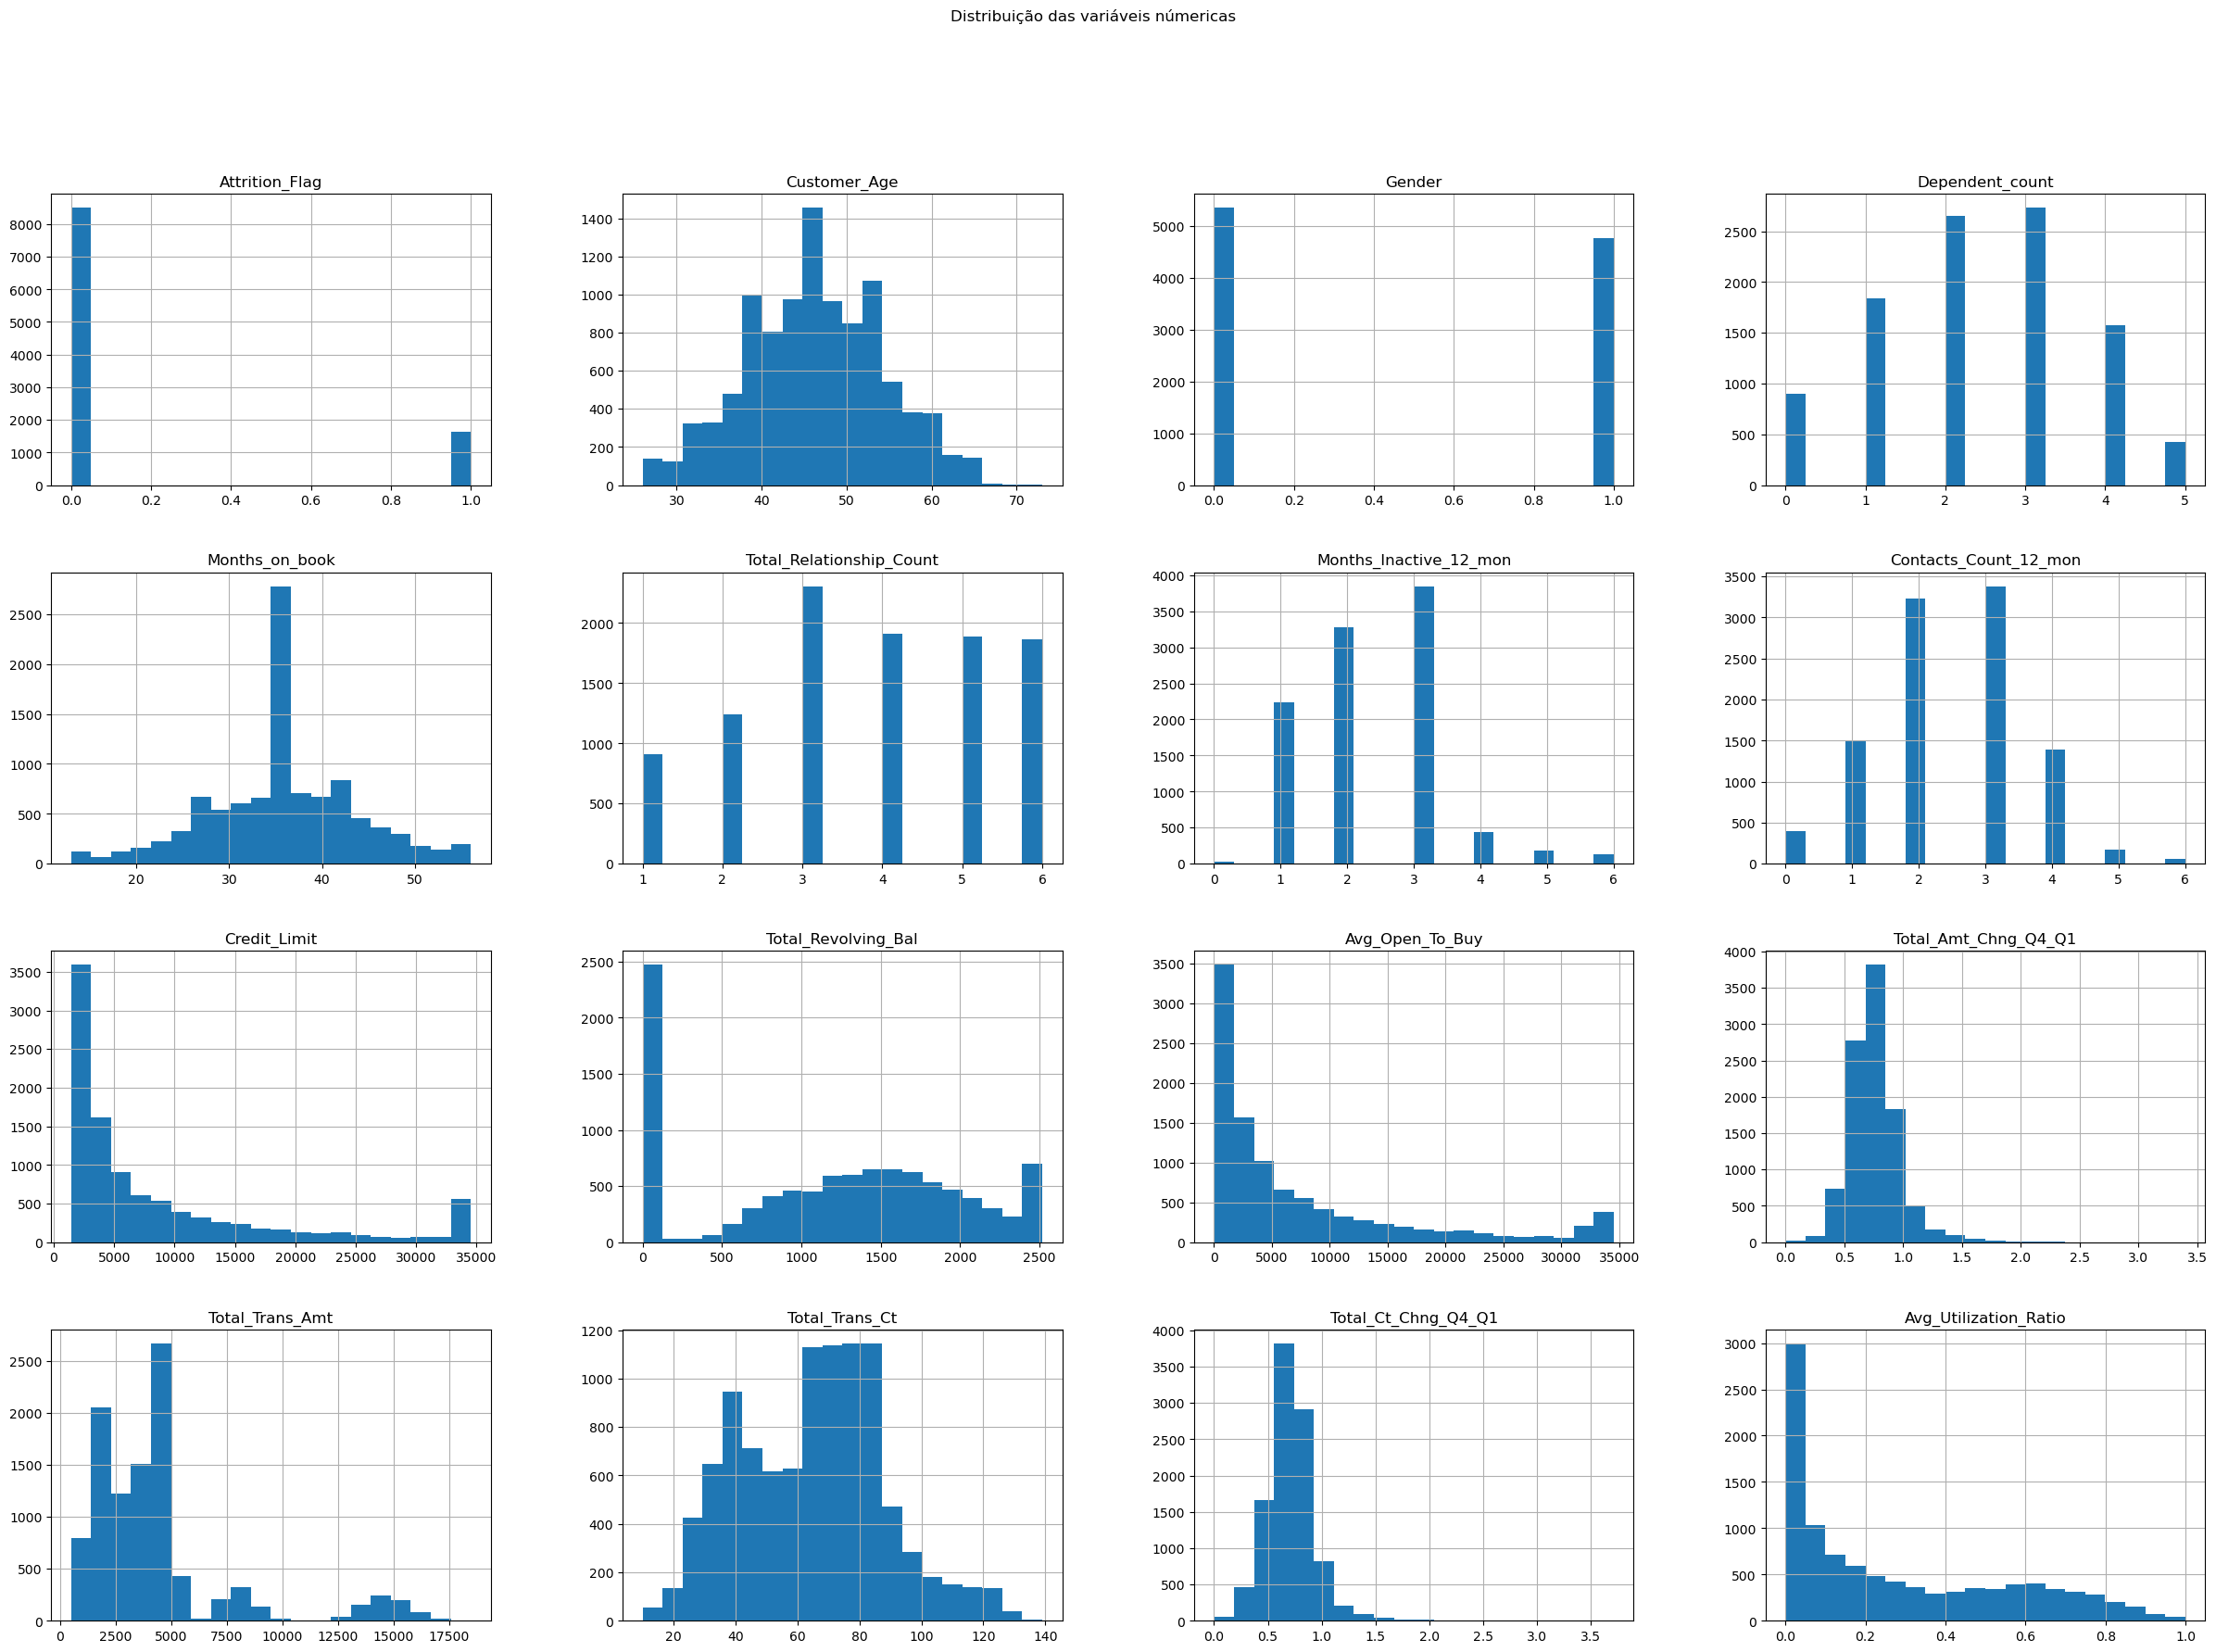

In [18]:
bankchurners.hist(bins=20, figsize=(30, 20))
plt.suptitle("Distribuição das variáveis númericas")
plt.show()

**Principais Descobertas:**

- **Customer_Age (Idade do Cliente):** A distribuição etária é próxima de uma normal, centrada ***entre 40 e 55 anos***, indicando uma ***base de clientes de meia-idade***. Esse grupo etário pode ter motivações de evasão diferentes em comparação com clientes mais jovens ou mais velhos, o que pode fornecer insights para estratégias de retenção.

- **Months_on_book (Meses como Cliente):** A maioria dos clientes está com o banco há ***30–40 meses***. Isso pode indicar uma "janela de risco de evasão" que ocorre nesse período, o que justifica uma análise mais aprofundada para verificar se um tempo maior de permanência impacta a probabilidade de evasão.

- **Credit_Limit (Limite de Crédito) e Total_Trans_Amt (Total de Transações):** Ambas as distribuições são ***assimétricas à direita***, com um pequeno subconjunto de clientes possuindo limites de crédito e valores de transação muito altos. Esses clientes de alto gasto podem ter comportamentos ou níveis de lealdade diferentes, o que pode afetar sua probabilidade de evasão.

- **Contacts_Count_12_mon (Número de Contatos em 12 Meses) e Months_Inactive_12_mon (Meses Inativos nos Últimos 12 Meses):** A maioria dos clientes teve ***1–2 meses inativos*** e ***2–4 contatos com o banco*** nos últimos 12 meses. Baixo engajamento ou contato infrequente pode ser um indicador potencial de evasão, pois esses clientes podem estar menos envolvidos com os serviços do banco.


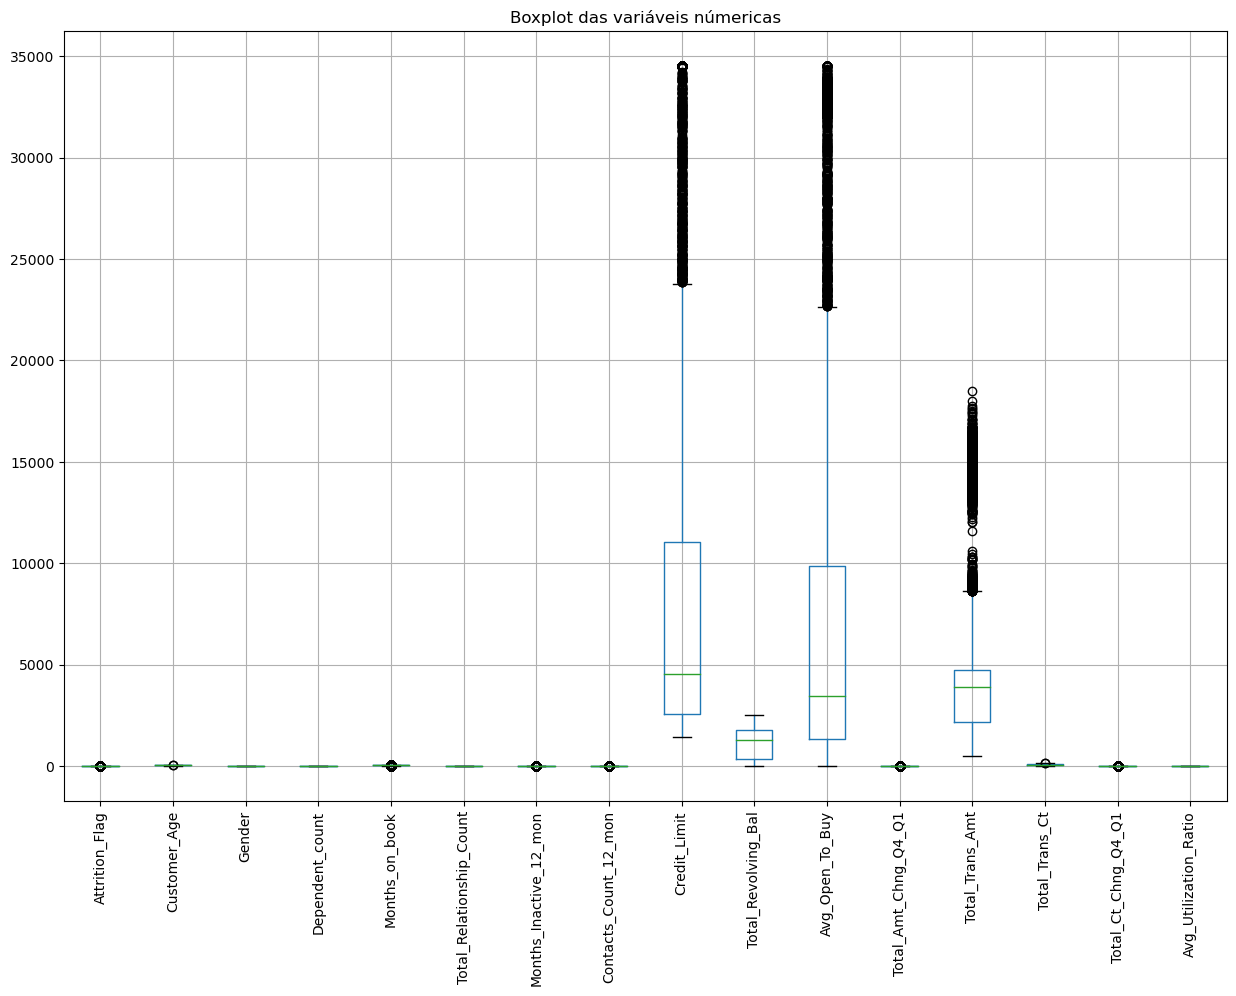

In [20]:
numeric_cols = bankchurners.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
bankchurners[numeric_cols].boxplot()
plt.title("Boxplot das variáveis númericas")
plt.xticks(rotation=90)
plt.show()

- **Credit_Limit (Limite de Crédito), Total_Revolving_Bal (Saldo Rotativo Total), Avg_Open_To_Buy (Média Disponível para Compras) e Total_Trans_Amt (Total de Transações):** Essas variáveis apresentam um ***grande número de valores discrepantes de alto valor***, que podem representar um subconjunto de clientes com perfis financeiros únicos (por exemplo, clientes de alto valor). Esses clientes podem se comportar de maneira diferente em termos de lealdade e padrões de evasão.

> Todos esses atributos representam os comportamentos de transação dos clientes. Partindo da suposição de que clientes com um maior número de transações, assim como um maior valor transacionado, terão um maior engajamento com o banco e, consequentemente, uma menor taxa de evasão, parece que remover esses "outliers" reduziria a capacidade do modelo de diferenciar entre clientes engajados (baixa evasão) e desengajados (alta evasão).

> Portanto, para este conjunto de dados, em vez de remover os outliers diretamente, pode ser mais benéfico: normalizar/padronizar ou aplicar uma transformação logarítmica em certas variáveis para reduzir o impacto de distribuições assimétricas, ou utilizar modelos robustos (por exemplo, métodos baseados em árvores como Random Forest) que são menos sensíveis


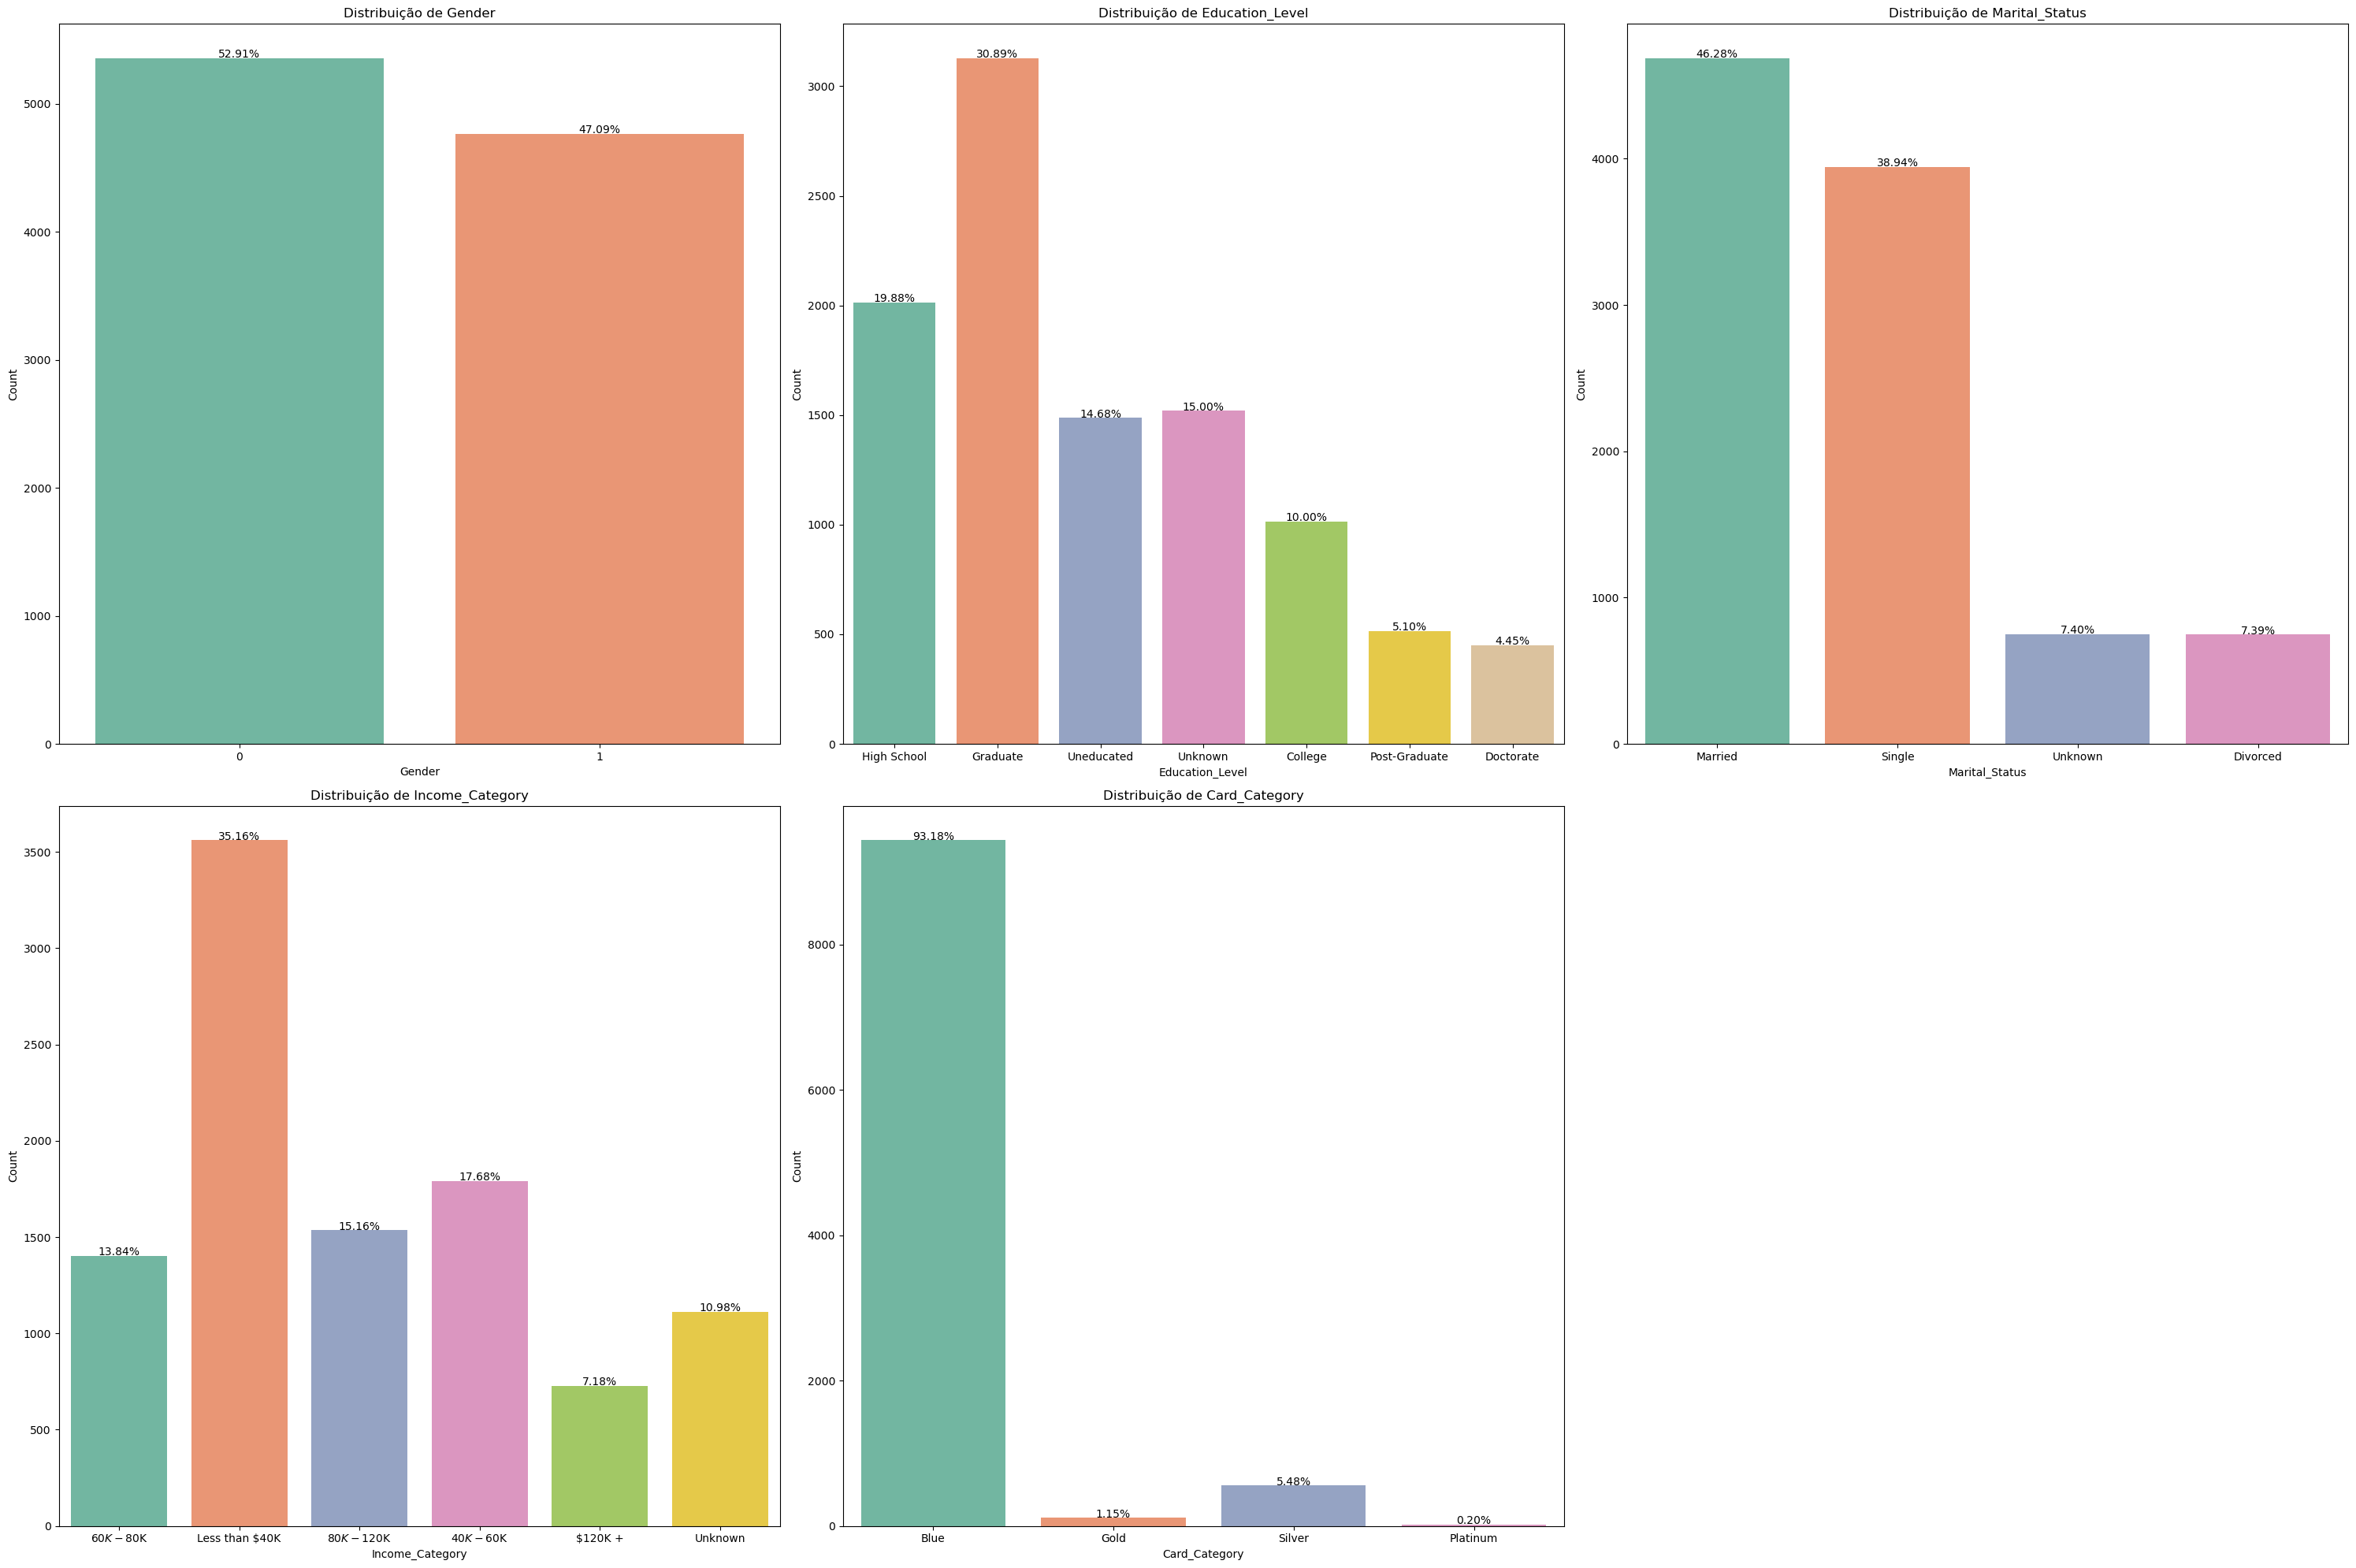

In [22]:
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(30, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)   
    sns.countplot(x=column, data=bankchurners, palette='Set2')
    total = len(bankchurners[column])
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = (height / total) * 100
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center')

    plt.title(f'Distribuição de {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- ***Gênero:*** relativamente equilibrado, com 52,93% rotulados como "0" e 47,07% como "1". Isso indica que o banco possui um número relativamente igual de clientes do sexo masculino e feminino, sem viés de gênero significativo.

- ***Nível de Educação:***  
  - A maioria dos clientes possui nível "Graduado" (49,89%), seguido por "Sem Educação" (14,61%) e "Ensino Médio" (10,88%).  
  - Clientes com níveis educacionais mais altos, como "Doutorado" e "Pós-Graduação", têm representação relativamente baixa (abaixo de 5,5%).  

- ***Estado Civil:*** a base de clientes do banco consiste principalmente em indivíduos casados, possivelmente famílias, enquanto clientes solteiros e divorciados representam uma parcela menor.  

- ***Faixa de Renda:***  
  - A maioria dos clientes se enquadra na faixa de renda "Menos de $40K" (46,14%), seguida por "40K - 60K" (17,48%) e "80K - 120K" (15,16%).  
  - A faixa de alta renda "$120K+" representa apenas 2,18%, enquanto "60K - 80K" corresponde a 13,44%.  
  > O banco atende principalmente clientes de baixa a média renda, com relativamente poucos clientes de alta renda.  

- ***Categoria do Cartão:*** A categoria de cartão "Blue" domina, com 93,18% dos clientes possuindo esse tipo de cartão, sugerindo que é a opção mais comum e provavelmente direcionada ao público em geral.  


### ***3. Relação entre a Variável Dependente e as Variáveis Independentes***  
#### *3.1. Análise das Variáveis Demográficas dos Clientes*  


In [23]:
from scipy.stats import chi2_contingency
chi_square_results = {}
for col in categorical_columns:
    if col != 'Attrition_Flag':    
        contingency_table = pd.crosstab(bankchurners['Attrition_Flag'], bankchurners[col])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results[col] = {'chi2': chi2, 'p-value': p, 'dof': dof}
chi_square_df = pd.DataFrame(chi_square_results).T
print(chi_square_df)

                      chi2   p-value  dof
Gender           13.865614  0.000196  1.0
Education_Level  12.511205  0.051489  6.0
Marital_Status    6.056097  0.108913  3.0
Income_Category  12.832259  0.025002  5.0
Card_Category     2.234227  0.525238  3.0


- **Atributos significativos (p-valor < 0,05):** Gênero, Nível de Educação, Faixa de Renda.  

- **Atributos não significativos (p-valor > 0,05):** Estado Civil, Categoria do Cartão.  


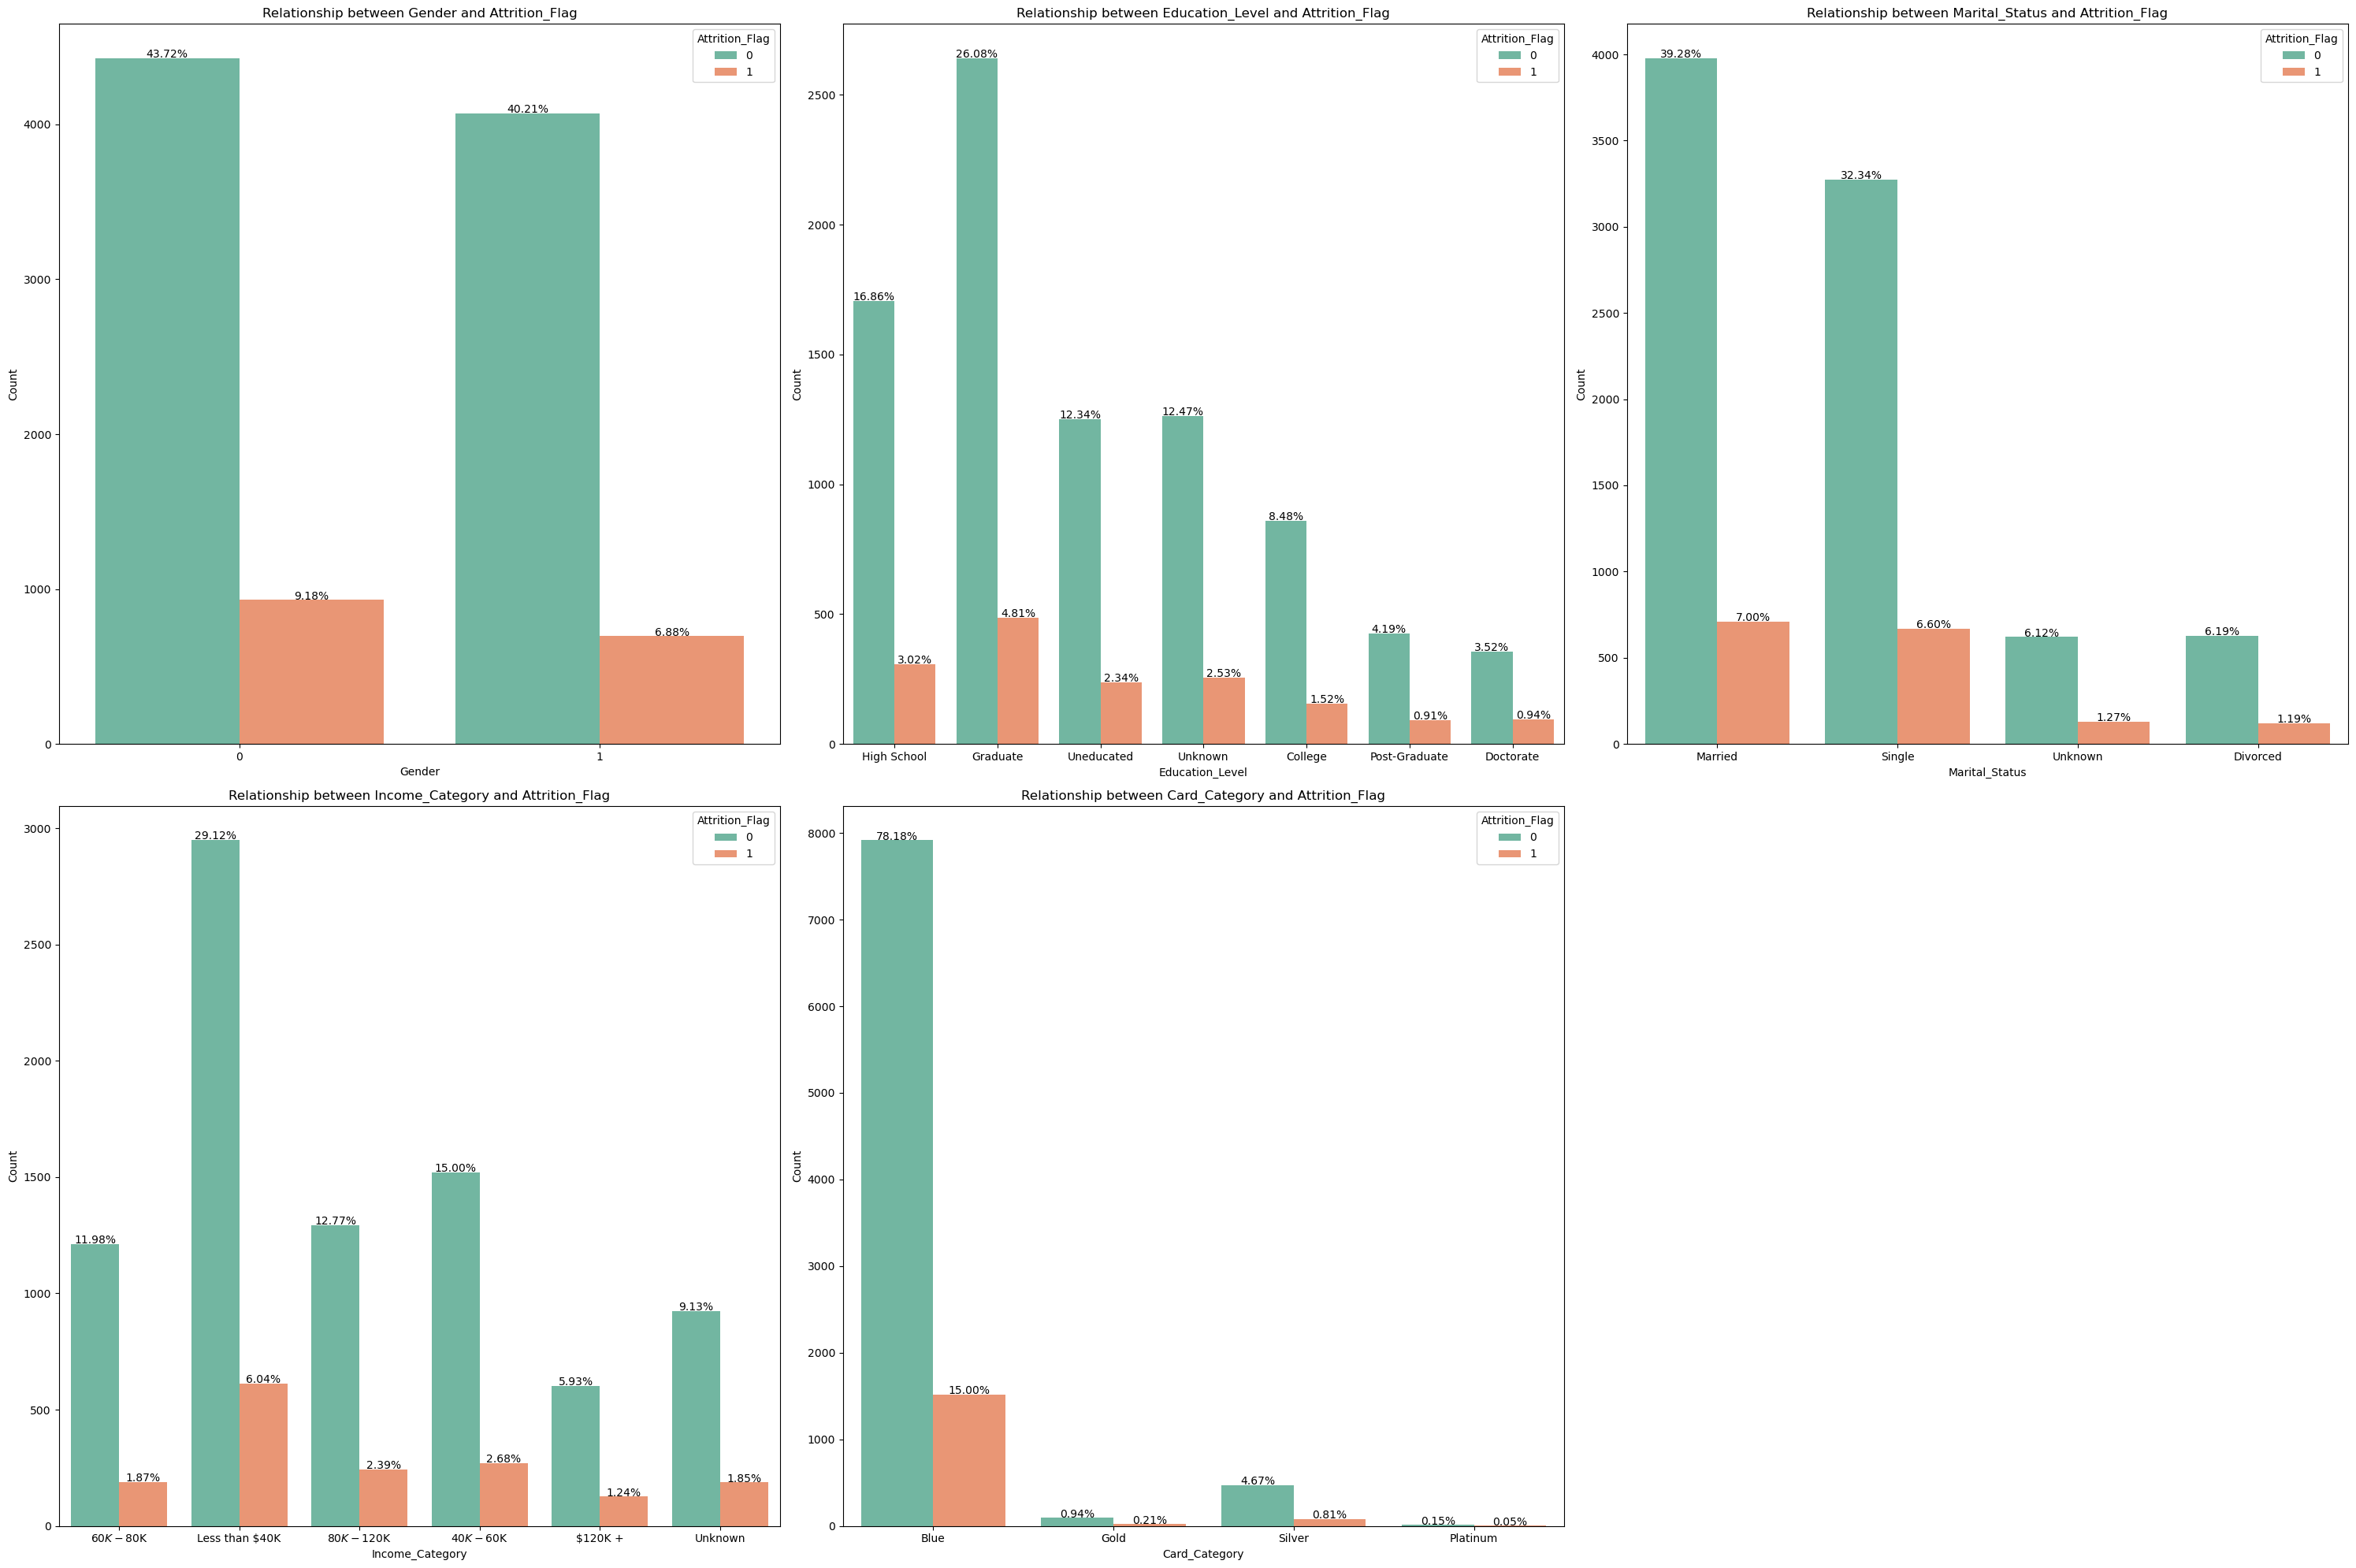

In [24]:
plt.figure(figsize=(30, 20))
 
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)   
    sns.countplot(x=column, hue='Attrition_Flag', data=bankchurners, palette='Set2')
    total = len(bankchurners[column])
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = (height / total) * 100
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center')

    plt.title(f'Relationship between {column} and Attrition_Flag')
    plt.ylabel('Count')

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()



- **Gênero:** Tanto clientes masculinos quanto femininos apresentam padrões de evasão semelhantes, com uma leve vantagem para os clientes existentes.

- **Nível de Educação:** A evasão é mais prevalente entre aqueles com níveis educacionais mais baixos, mas os clientes existentes ainda dominam em todas as categorias.

- **Faixa de Renda:** As faixas de renda mais baixas exibem maior evasão, mas os clientes existentes continuam sendo a maioria.


#### *3.2. Análise das Variáveis de Comportamento dos Clientes*


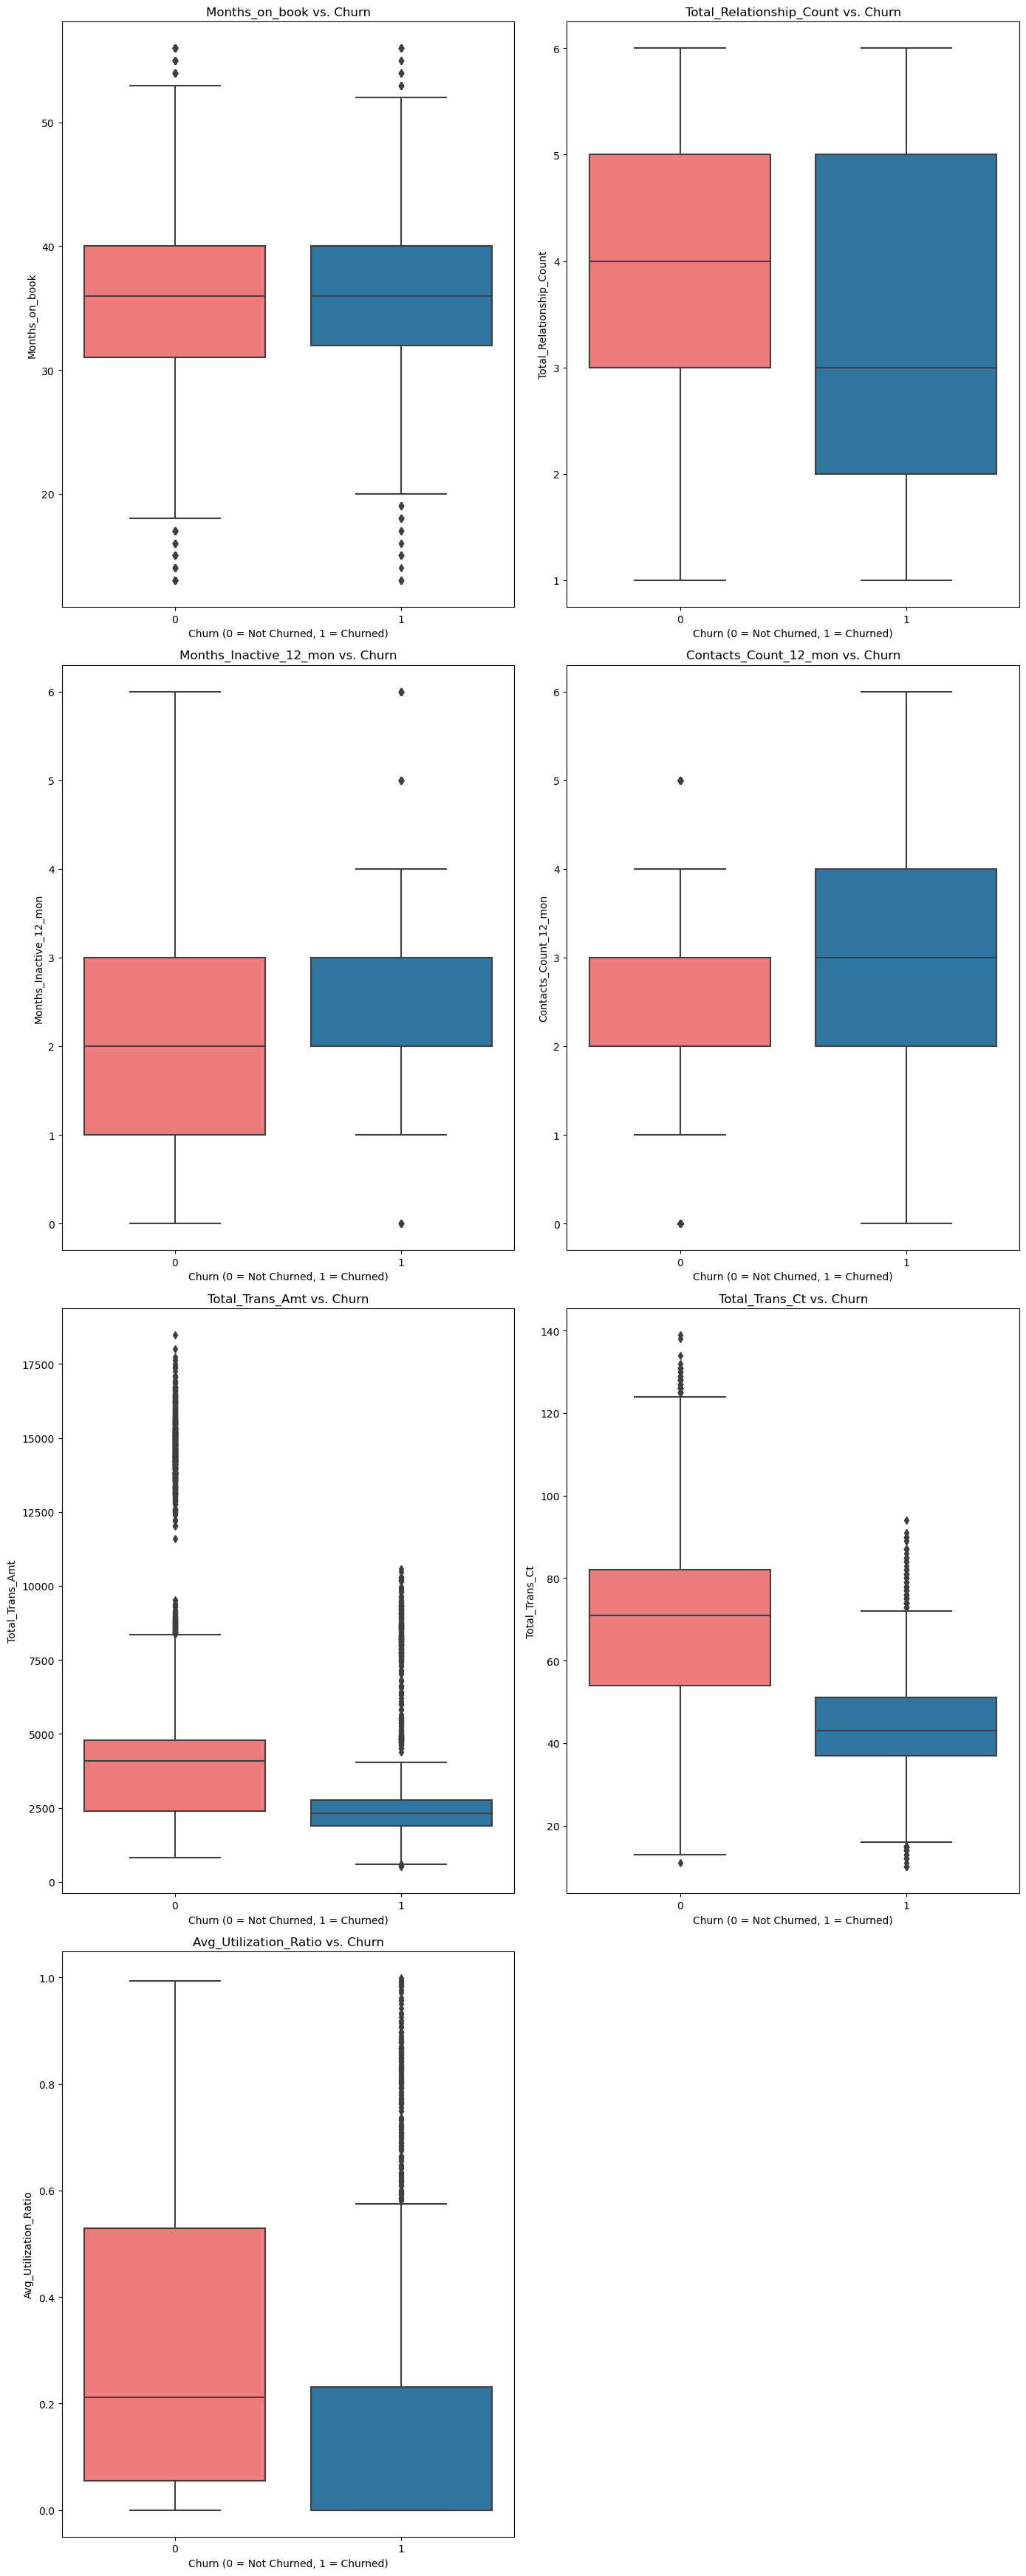

In [25]:
behavioral_vars = [
    'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

plt.figure(figsize=(14, 35))
for i, var in enumerate(behavioral_vars, 1):
    plt.subplot(4, 2, i)  # Sắp xếp biểu đồ 4 hàng x 2 cột
    sns.boxplot(x='Attrition_Flag', y=var, data=bankchurners, palette=["#FF6B6B", "#1F77B4"])  
    plt.title(f'{var} vs. Churn')
    plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()



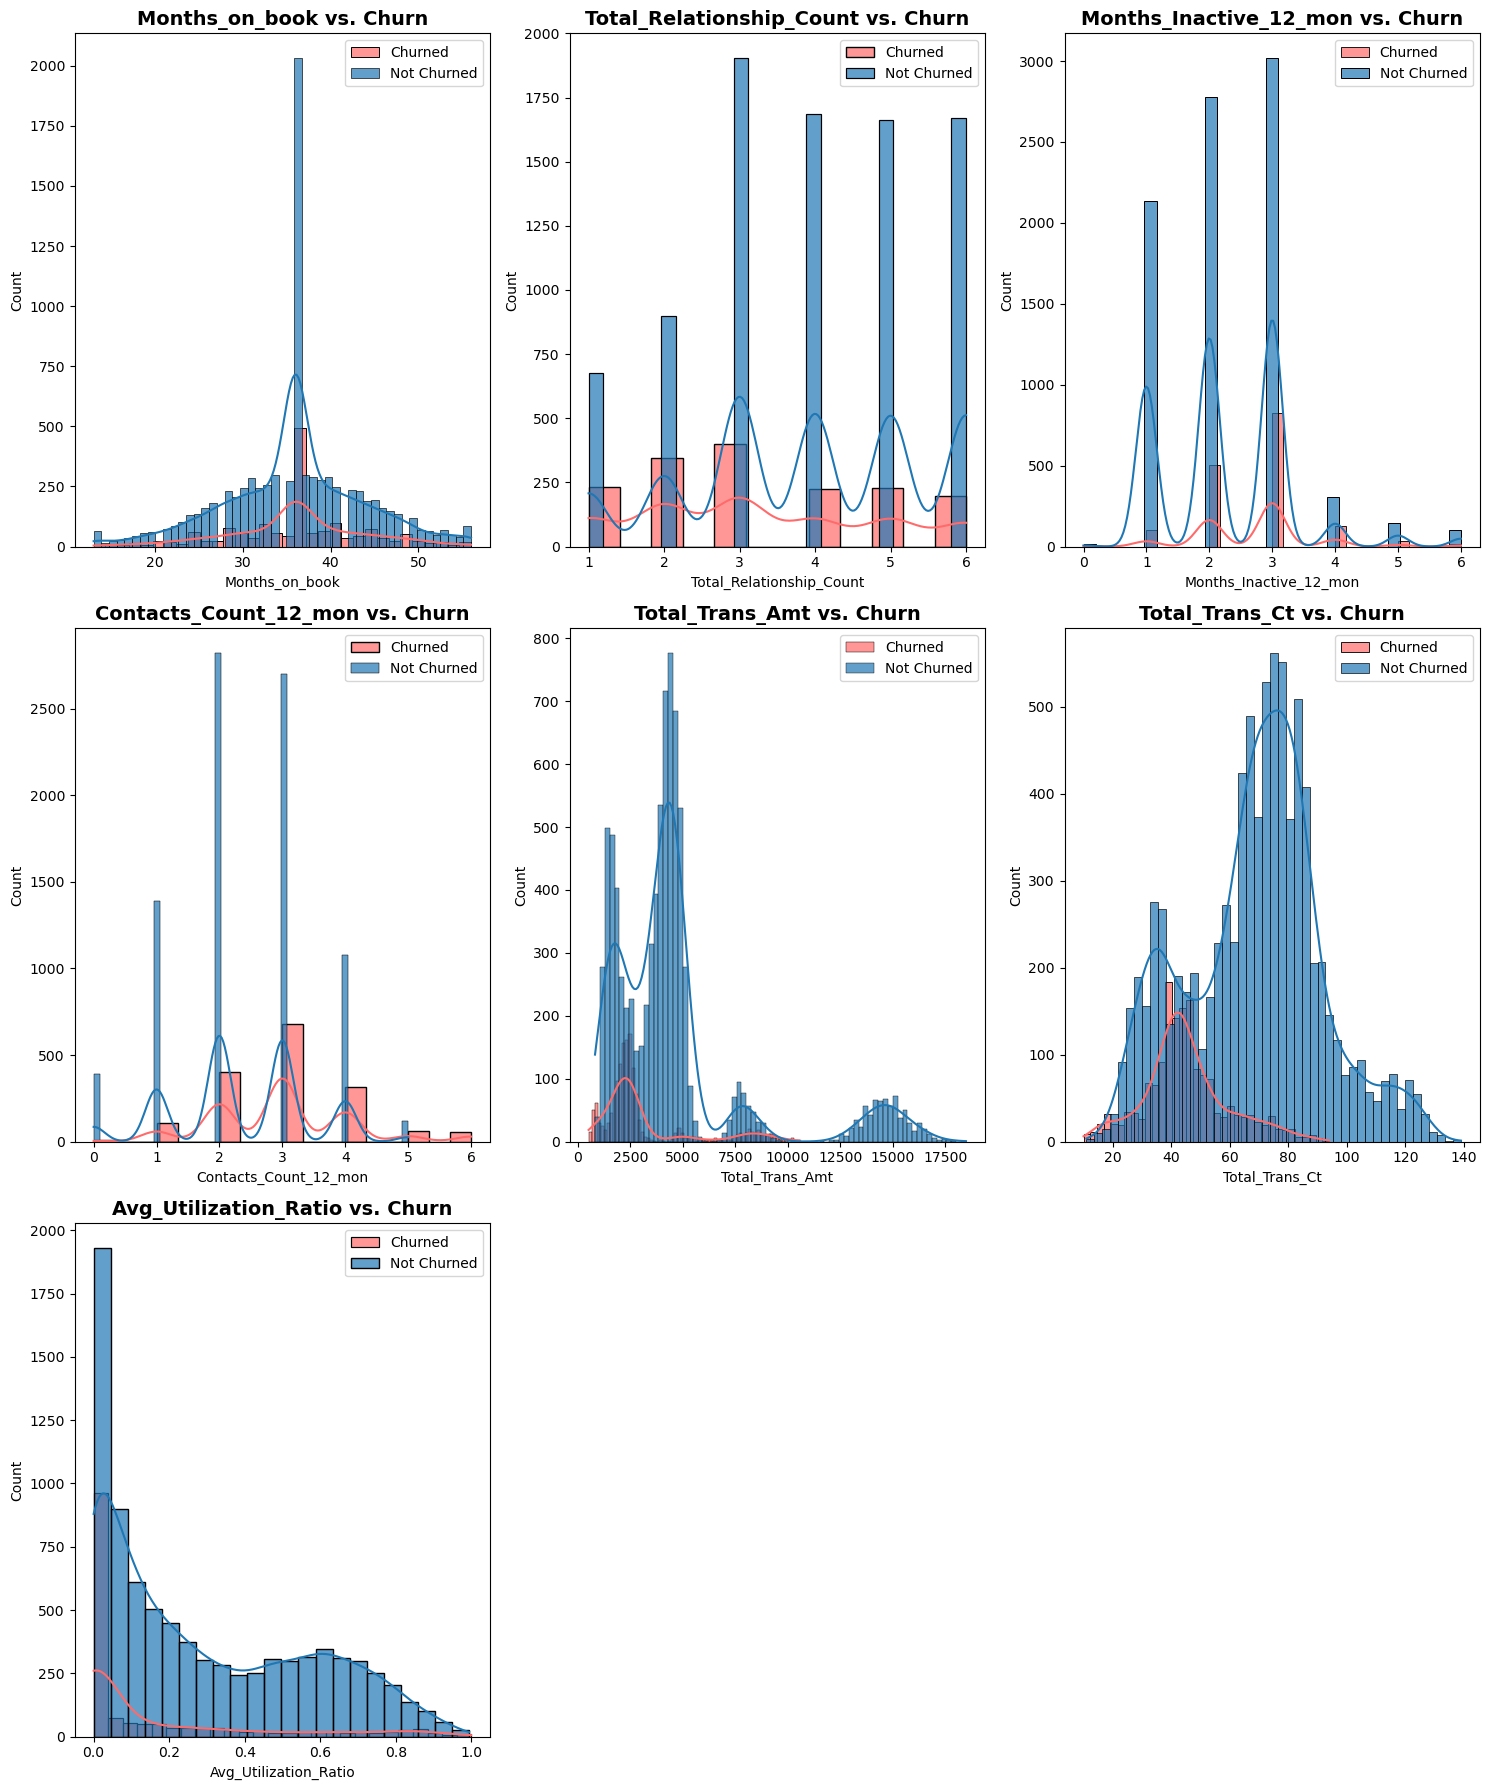

In [26]:
plt.figure(figsize=(15, 18))
for i, var in enumerate(behavioral_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bankchurners[bankchurners['Attrition_Flag'] == 1][var], color='#FF6B6B', label='Churned', kde=True, alpha=0.7)
    sns.histplot(bankchurners[bankchurners['Attrition_Flag'] == 0][var], color='#1F77B4', label='Not Churned', kde=True, alpha=0.7)
    plt.title(f'{var} vs. Churn', fontsize=14, fontweight='bold')
    plt.xlabel(var)
    plt.legend()
plt.tight_layout()
plt.show()

***Análise e Insights Acionáveis:***

**1. Nível de Engajamento do Cliente e Evasão**

- ***Visão Geral:*** Variáveis como *Total_Relationship_Count*, *Total_Trans_Ct* e *Months_on_book* indicam uma forte ligação entre o engajamento do cliente e a probabilidade de evasão. Clientes com **um número elevado de relacionamentos com o banco (4 produtos ou mais), transações frequentes (60-90 transações por ano) e um longo tempo de permanência (mais de 40 meses) tendem a ter taxas de evasão mais baixas.**

- ***Análise Estatística (Histplot e Boxplot):***
  - ***Months_on_book (Meses como Cliente):*** O histplot revela um pico significativo de **evasão por volta de 36 meses**, indicando uma tendência dos clientes de deixar o banco nesse ponto. O boxplot mostra que o grupo sem evasão tem uma distribuição mais ampla com maior tempo de permanência, destacando que a retenção de clientes se torna uma preocupação após cerca de três anos.
  
  - ***Total_Relationship_Count (Número de Relacionamentos):*** Tanto o histplot quanto o boxplot mostram que clientes que **evadem tendem a ter menos relacionamentos com o banco (1-2 produtos), enquanto a taxa de não evasão aumenta entre os clientes que usam 4-6 produtos**. Isso implica que o uso de múltiplos produtos bancários é um fator crítico na retenção de clientes.

  - ***Total_Trans_Ct (Número de Transações):*** O histplot revela que clientes que evadem geralmente realizam menos transações, cerca de 20-40 por ano, enquanto o grupo sem evasão tem um número significativamente maior de transações, entre 60-90. O boxplot indica uma mediana e IQR muito maiores para o grupo sem evasão, sugerindo que uma alta frequência de transações é um forte indicador de engajamento.

  - ***Total_Trans_Amt (Total de Transações):*** Seguindo a mesma tendência de *Total_Trans_Ct*, clientes que evadem geralmente têm baixos valores anuais de transações, geralmente abaixo de 5.000, enquanto o grupo sem evasão tem uma distribuição mais ampla, frequentemente na faixa de 5.000-10.000.

  - ***Avg_Utilization_Ratio (Média da Taxa de Utilização):*** A distribuição para clientes sem evasão é mais uniforme ao longo da faixa, enquanto clientes que evadem estão mais concentrados na faixa de baixa utilização (cerca de 0 a 0,2). Isso sugere que taxas de utilização mais baixas podem ser mais comuns entre os clientes que evadem.

> ***Insights Acionáveis:***  
> - Para reduzir a evasão, o banco deve focar em engajar clientes que estão com eles há cerca de 36 meses, oferecendo incentivos especiais e programas de cuidado nesse estágio crítico.  
> - Além disso, promover a venda cruzada de produtos e incentivar transações frequentes pode aumentar o engajamento do cliente e, em seguida, ajudar a reduzir as taxas de evasão, particularmente para clientes com menos relacionamentos com produtos.

**2. Inatividade e Alta Frequência de Contato como Indicadores de Evasão**

- ***Visão Geral:*** *Months_Inactive_12_mon* e *Contacts_Count_12_mon* indicam que clientes com **um maior número de meses inativos ou com contato frequente com o banco têm maior probabilidade de evadir**. Esse padrão sugere uma possível insatisfação ou falta de engajamento com as ofertas do banco.

- ***Análise Estatística (Histplot e Boxplot):***

  - ***Months_Inactive_12_mon (Meses Inativos nos Últimos 12 Meses):*** O histplot mostra que clientes que evadem frequentemente têm **2-4 meses inativos** em um ano, enquanto o grupo sem evasão é geralmente mais consistente em termos de atividade. O boxplot indica uma mediana e IQR mais altos para o grupo de evasão, sinalizando que a inatividade prolongada pode ser um sinal de perda de interesse pelos serviços do banco.

  - ***Contacts_Count_12_mon (Número de Contatos nos Últimos 12 Meses):*** O histplot mostra que clientes que evadem **frequentemente entram em contato com o banco 3-4 vezes por ano, mais do que o grupo sem evasão**, sugerindo que eles podem estar enfrentando problemas ou insatisfações que os levam a buscar assistência.

> ***Insights Acionáveis:*** O banco poderia implementar programas de reativação para clientes com inatividade prolongada, oferecendo incentivos para incentivar o reengajamento. Para clientes que entram em contato frequentemente com o banco, seria benéfico identificar proativamente e resolver as causas de suas preocupações, possivelmente por meio de pesquisas de qualidade de serviço e suporte personalizado, para reduzir a insatisfação.


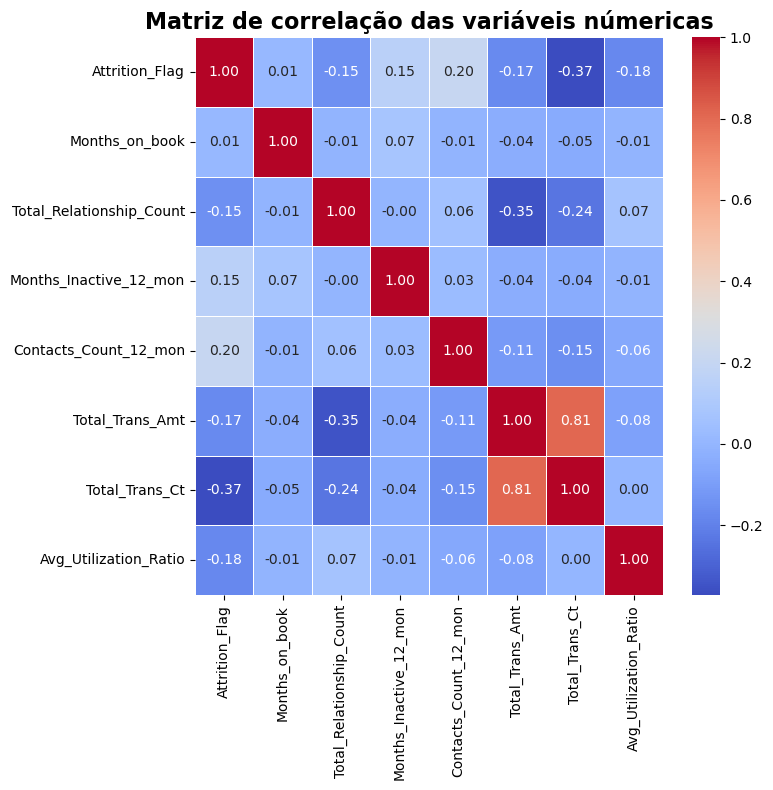

In [28]:
behavioral_vars1 = [
    'Attrition_Flag', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]
correlation_matrix = bankchurners[behavioral_vars1].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlação das variáveis númericas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


> Com base na EDA (Análise Exploratória de Dados) usando boxplots e histogramas, observamos algumas tendências, como maior gasto com o banco correlacionando-se com menores taxas de evasão. No entanto, a análise de correlação da heatmap mostra que os coeficientes de correlação estão próximos de zero, indicando que não há uma relação linear clara entre a variável alvo (Flag de Evasão) e outras variáveis numéricas. Isso sugere que modelos que exigem relações lineares, como a Regressão Logística, podem ter dificuldade em capturar os padrões subjacentes necessários para prever a evasão com precisão.


## **V. Feature Engineering and Selection**

In [29]:
bankchurners.drop(['Marital_Status', 'Card_Category'], axis=1, inplace=True)

In [30]:
# One-hot encoding para colunas multicategóricas
## Converter variáveis categóricas (características com categorias discretas) em um formato binário que os modelos de aprendizado de máquina possam usar de forma mais eficaz, especialmente quando não há uma ordem inerente entre as categorias.  
bankchurners = pd.get_dummies(bankchurners, columns=['Education_Level', 'Income_Category'], drop_first=True)


In [31]:
scaler = StandardScaler()
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']
bankchurners[numerical_features] = scaler.fit_transform(bankchurners[numerical_features])


In [32]:
from sklearn.decomposition import PCA
scaled_data = bankchurners[['Total_Trans_Amt', 'Total_Trans_Ct']]
pca = PCA(n_components=1)  # Giảm về 1 chiều
bankchurners['Total_Trans_PCA'] = pca.fit_transform(scaled_data)

/home/wellison/.local/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.02853178 0.01526364 0.02253166 0.02549493 0.0678407  0.03572609
 0.04164156 0.02838236 0.10677193 0.02875844 0.04347442 0.12047672
 0.13092167 0.06936637 0.04158356 0.00515722 0.01091681 0.00939039
 0.00577204 0.00833243 0.00913599 0.00760239 0.00617383 0.00689226
 0.00856187 0.00573834 0.10956058]


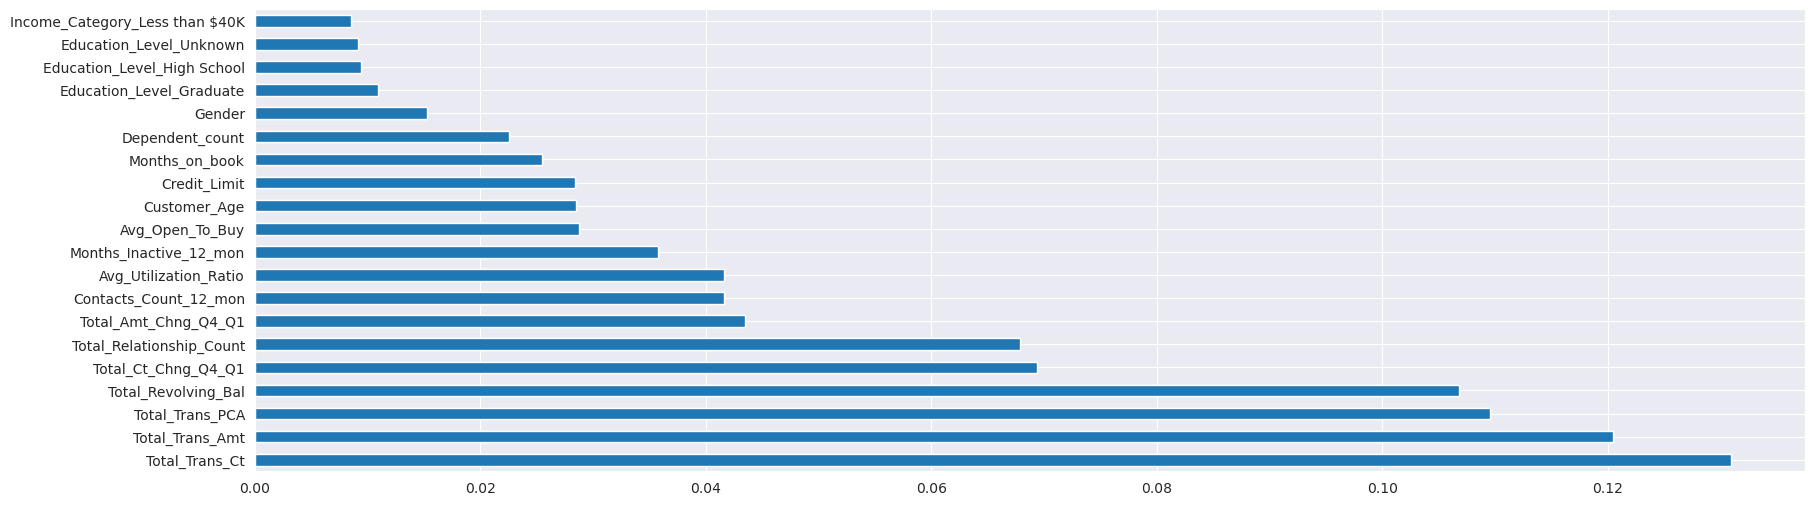

In [33]:
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')

x = bankchurners.loc[:, bankchurners.columns !='Attrition_Flag']
y = bankchurners.loc[:, bankchurners.columns == 'Attrition_Flag']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
img = feat_importances.nlargest(20).plot(kind = 'barh')
labels1 = feat_importances.nlargest(20).plot(kind = 'barh').get_yticklabels()
plt.show()

In [34]:
required_labels = list()
for i in labels1:
    j = str(i)
    required_labels.append(j[12:len(j)-2])

## **V. Model Implementation**
### **1. Data Splitting**

In [35]:

X = bankchurners.drop('Attrition_Flag', axis=1)  
y = bankchurners['Attrition_Flag']  

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Razões para escolher Random Forest***  
- ***Lida com Relações Não Lineares:*** Como o conjunto de dados contém variáveis numéricas e categóricas, o Random Forest pode capturar relações complexas e não lineares entre as features e a variável alvo (evasão).  

- ***Manejo de Dados Desbalanceados:*** A capacidade do Random Forest de utilizar bootstrap e agregar resultados de múltiplas árvores pode ajudar a equilibrar a influência de classes minoritárias, como clientes que cancelaram (16,07%) neste caso.  

- ***Redução do impacto de outliers:*** O Random Forest é menos sensível a outliers, tornando-se ideal para features como **Total_Revolving_Bal, Avg_Open_To_Buy e Total_Trans_Amt**, que possuem valores extremos. As divisões baseadas em árvores ajudam a reduzir o impacto desses valores extremos, capturando padrões de forma mais eficaz.  

***A principal intuição por trás do algoritmo:***  
- **Amostragem Bootstrap:** Cada árvore é treinada em um subconjunto aleatório dos dados (com reposição), introduzindo variedade e reduzindo a variância.  

- **Seleção Aleatória de Features:** A cada divisão, apenas um subconjunto aleatório de features é considerado, evitando que uma única feature domine e garantindo árvores mais diversas.  

- **Votação em Conjunto (Ensemble Voting):** Para classificação, cada árvore "vota" na classe e a maioria dos votos define a previsão final. Essa abordagem de conjunto ajuda a suavizar erros e melhora a precisão.  

***Ajuste de Hiperparâmetros para Random Forest:***  
- Número de Árvores (**n_estimators**): define a quantidade de árvores na floresta  
  - **n_estimators = 100**  
- Profundidade Máxima (**max_depth**): profundidade máxima de cada árvore  
  - **max_depth = 50**  
- Mínimo de Amostras por Folha (**min_samples_leaf**): número mínimo de amostras necessárias para formar uma folha  
  - **min_samples_leaf = 5**  
- Mínimo de Amostras para Divisão (**min_samples_split**): número mínimo de amostras necessárias para dividir um nó interno em uma árvore de decisão  
  - **min_samples_split = 20**  
- Peso das Classes (**class_weight**): atribui pesos diferentes às classes, ajudando a lidar com conjuntos de dados desbalanceados  
  - **class_weight = 'balanced'**  


In [37]:
rfcl = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=20, min_samples_leaf=5, class_weight='balanced',random_state=42)
rfcl = rfcl.fit(X_train, y_train)

In [38]:
y_train_rf = rfcl.predict(X_train)

In [39]:
y_test_rf = rfcl.predict(X_test)

## **VI. Avaliação do modelo**

In [40]:
print("Model Accuracy:", rfcl.score(X_train, y_train))

Model Accuracy: 0.9738995485327314


In [41]:
print("Model Accuracy:", rfcl.score(X_test, y_test))

Model Accuracy: 0.9526159921026653


In [44]:

cm_rf = confusion_matrix(y_test, y_test_rf, labels=[0, 1])  # 1 = Churn, 0 = No Churn

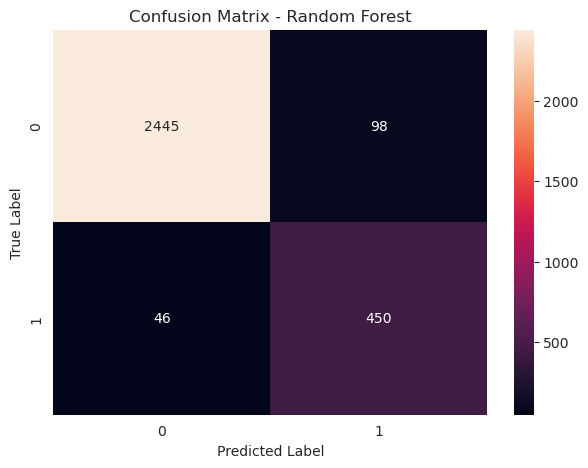

In [45]:
df_cm_rf = pd.DataFrame(cm_rf)

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_rf, annot=True, fmt='g')
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [46]:
print(classification_report(y_test, y_test_rf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2543
           1       0.82      0.91      0.86       496

    accuracy                           0.95      3039
   macro avg       0.90      0.93      0.92      3039
weighted avg       0.96      0.95      0.95      3039



In [ ]:
from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


cv_scores = cross_val_score(rfcl, X, y, cv=stratified_kfold)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


y_pred = cross_val_predict(rfcl, X, y, cv=stratified_kfold)


print(classification_report(y, y_pred))

Cross-validation scores: [0.94669299 0.94866732 0.96051333 0.95459033 0.94076999 0.96248766
 0.94570582 0.95849802 0.96936759 0.96146245]
Mean cross-validation score: 0.9548755506479013
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8500
           1       0.83      0.91      0.87      1627

    accuracy                           0.95     10127
   macro avg       0.90      0.94      0.92     10127
weighted avg       0.96      0.95      0.96     10127



In [48]:
print("ROC AUC Score:", roc_auc_score(y_test, rfcl.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.9867322377684473


In [49]:
cv_scores = cross_val_score(rfcl, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")

Cross-Validation ROC AUC Scores: [0.89731685 0.98404908 0.99460452 0.99761086 0.67412579]
Mean ROC AUC Score: 0.9095414218693613


**Discussão sobre os Pontos Fortes e Fracos do Modelo Random Forest**

***1. Pontos Fortes***  
- **Manejo de Desequilíbrio de Classes**: O parâmetro ***class_weight='balanced'*** ajusta a função de perda do modelo para dar mais importância à classe minoritária, permitindo que o Random Forest foque mais na previsão de clientes que irão cancelar (classe 1). Isso resulta em:  
  - **Maior recall** para cancelamento (classe 1), o que é crucial para prever quem provavelmente irá sair. O recall é particularmente importante na previsão de cancelamento, pois garante que a maioria dos clientes que sairão sejam identificados.  

  - **F1-score para cancelamento:** O F1-score para clientes cancelados no conjunto de treino é 0,93, indicando um bom equilíbrio entre precisão e recall. No conjunto de teste, é 0,87, mostrando que, embora possa haver espaço para melhorias, o modelo ainda identifica eficazmente os clientes em risco.  

- **Desempenho no Conjunto de Teste**  
  - **Acurácia**: O modelo alcança uma acurácia de 94,80% no conjunto de teste, refletindo um bom desempenho geral.  

  - **Precisão e Recall para Cancelamento:** A precisão para cancelamento é 0,82 e o recall é 0,88 no conjunto de teste. Isso mostra que o modelo é bastante eficaz em identificar clientes que irão cancelar (alto recall), com alguns falsos positivos (precisão moderada).  

- **Desempenho na Validação Cruzada**  
  - Ao usar Validação Cruzada Estratificada (5-fold), a acurácia média da validação cruzada é 95,17%, com desempenho consistente e estável em todas as dobras. Isso é um indicativo importante de como o modelo se generaliza para dados não vistos.  
  - O score ROC AUC para o processo de validação cruzada é 0,98, sugerindo que o modelo é muito eficaz em distinguir entre clientes que cancelam e os que não cancelam.  

  > A validação cruzada estratificada garante uma distribuição equilibrada de instâncias de cancelamento e não cancelamento em cada dobra, resultando em uma avaliação mais confiável do desempenho do modelo em conjuntos de dados desbalanceados.  

***2. Pontos Fracos***  
- **Interpretabilidade**  
  - Embora a importância das features possa ajudar a entender quais variáveis influenciam as previsões, o Random Forest continua sendo um ***modelo de caixa-preta*** quando se trata de explicar previsões individuais. Isso pode ser um ***desafio para stakeholders que precisam entender por que um determinado cliente foi previsto como provável de cancelar ou não.***  

  - Para empresas que dependem de processos de decisão transparentes, a falta de clareza sobre como o Random Forest chega às previsões pode dificultar sua adoção.  

- **Dificuldade com Desequilíbrios Extremos de Classe:** Apesar do uso de pesos de classe e da obtenção de um alto recall, o modelo ainda pode enfrentar desafios para prever com precisão os clientes que irão cancelar quando o desbalanceamento de classes for particularmente severo.  
  ***Em aplicações práticas, onde a taxa de desbalanceamento pode variar, há um risco significativo de que o modelo não consiga identificar de forma confiável os clientes que irão cancelar, levando a previsões menos eficazes.***  


In [50]:
y_predict = rfcl.predict(X_test)
churned_customers = X_test[y_predict == 0]

In [51]:
print("Churned Customers:")
print(churned_customers)

Churned Customers:
      Customer_Age  Gender  Dependent_count  Months_on_book  \
3781      0.208826       0         0.503368        0.384621   
2922      1.581010       1        -1.036462        2.137684   
5070     -1.163358       0        -0.266547        0.008965   
7246      0.084082       1         0.503368        0.008965   
623      -0.539638       1         0.503368       -0.366692   
...            ...     ...              ...             ...   
6621      0.333570       1         1.273283       -0.742348   
9535     -0.913870       1        -1.036462        0.008965   
4638      1.206778       1        -0.266547        1.511590   
1166     -1.038614       0        -0.266547        0.008965   
254       2.953194       1        -1.806378        2.513340   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3781                  0.120579                0.651940               1.396424   
2922                  0.763943                2.631016        

## **VII.Avaliação das variáveis** 

In [52]:
importances = rfcl.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance':importances})

In [53]:
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

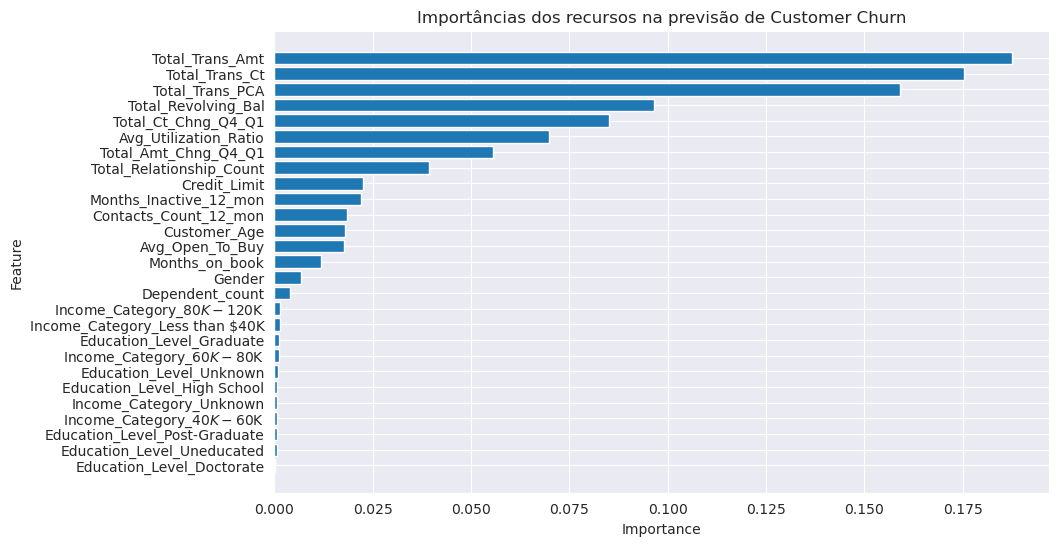

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importâncias dos recursos na previsão de Customer Churn')
plt.gca().invert_yaxis()
plt.show()

## **VII. Conclusão**

---

Este projeto utilizou um modelo de Random Forest para prever o churn de clientes, revelando padrões-chave de comportamento e uso de produtos que informam estratégias de retenção. O alto desempenho do nosso modelo em métricas como AUC-ROC confirmou sua eficácia em identificar clientes propensos a deixar o banco.

Os principais fatores que influenciam o churn incluem **comportamentos de transação** (por exemplo, frequência e valor total) e **diversidade no uso de produtos**. Clientes que realizam transações com mais frequência e utilizam múltiplos produtos são menos propensos a deixar. A interpretabilidade do modelo de Random Forest forneceu insights claros sobre a importância das variáveis, permitindo que o banco identificasse fatores impactantes para estratégias proativas de retenção.

---

***Recomendações de Negócio:***

- **Engajamento Direcionado:** Para clientes com queda na atividade de transações, o banco poderia implementar campanhas de reengajamento personalizadas, como ofertas de fidelidade e promoções especiais.

- **Incentivo ao Uso de Produtos:** Incentivar os clientes a utilizarem produtos adicionais e fornecer recursos de gerenciamento de crédito poderia aprofundar o relacionamento com o cliente.

- **Aperfeiçoamento da Segmentação de Clientes:** Utilizando dados demográficos, o banco pode segmentar ainda mais os clientes de alto risco para uma abordagem personalizada.

Ao combinar os insights do modelo com estratégias de negócios, o banco pode melhorar a lealdade dos clientes, reduzir o churn e melhorar a estabilidade da receita. Esta abordagem orientada por dados permite que o banco faça esforços de retenção direcionados e eficientes, maximizando a satisfação do cliente e o crescimento a longo prazo.
